In [ ]:
# Data Collection

!pip install kaggle --upgrade
!pip3 install Pillow

import kaggle
import os
import json
import random
from datetime import datetime
from PIL import Image
from PIL.ExifTags import TAGS

def get_colors(image_file, numcolors=3, resize=150, output = []):
    # Resize image to speed up processing
    img = Image.open(image_file)
    img = img.copy()
    img.thumbnail((resize, resize))
 
    # Reduce to palette
    paletted = img.convert('P', palette=Image.ADAPTIVE, colors=numcolors)
 
    # Find dominant colors
    palette = paletted.getpalette()
    color_counts = sorted(paletted.getcolors(), reverse=True)
    colors = list()
    for i in range(numcolors):
        palette_index = color_counts[i][1]
        dominant_color = palette[palette_index*3:palette_index*3+3]
        colors.append(tuple(dominant_color))
    return colors

In [ ]:
## You have to collect and download a set of images. You have the following tasks to program, automating the process as much as possible:

### 1. Create a folder called images.

!mkdir -p ./images
!mkdir -p ./metadata

### 2. Download open-licensed images to the folder images (minimum 100 images).

kaggle.api.authenticate()
kaggle.api.dataset_download_files('nielspace/pexels-mountain-images', path='./images', unzip=True)    
    
### 3. Save metadata of every image like image size, image format (.jpeg, .png, etc.), image orientation (landscape, portrait, square, etc.), creation date, camera model, etc. in one or more JSON files. You can make use of the Exif information present in the image files.

directory = './images/Mountain'
metadata = {}
orientation = ""

for filename in os.listdir(directory) :
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        path, file_extension = os.path.splitext(f)
        time_creation = os.path.getmtime(f)
        size = Image.open(f).size
        if size[0]>size[1] :
            orientation = "landscape"
        elif size[0] == size[1] :
            orientation = "square"
        else :
            orientation = "portrait"
        metadata[filename] = {
            "file_extension": file_extension,
            "creation_date": datetime.fromtimestamp(time_creation/1000.0).strftime("%m/%d/%Y, %H:%M:%S"),
            "size": size,
            "orientation": orientation,
            "colors": get_colors(directory + "/" + filename)
            }

with open("./metadata/metadata.json", "w") as outfile:
    json.dump(metadata, outfile, indent=4)

        

In [ ]:
# Labeling and Annotation

directory = './images/Mountain'
data_path = "./metadata/metadata.json"



if os.path.isfile(data_path):
    with open(data_path) as target:
        json_data = json.load(target)
        
for filename in os.listdir(directory) :
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        tags = {}
        tags["like"] = random.randint(0,100)
        tags["hashtag"] = "moutain"
        rand = random.randint(1, 3)
        if rand == 1 :
            tags["test"] = "yes"
        else :
            tags["test"] = "no"
        json_data[filename]["tags"] = tags
        
with open("./metadata/metadata.json", "w") as outfile:
    json.dump(json_data, outfile, indent=4)

In [142]:
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Data Analyses

numb_users = 1
directory = './images/Mountain'
data_path = "./metadata/metadata.json"
rand = 0

# Metadata for each file
if os.path.isfile(data_path):
    with open(data_path) as target:
        json_data = json.load(target)

# Creating data for each user
json_data_users = {}        
for i in range (0, numb_users):
    images_per_users = []
    tags_per_users = []
    rand = random.randint(1, 4)
    if rand == 1:
        tags_per_users.append(["like", "colors"])
    elif rand == 2:
        tags_per_users.append("colors")
    elif rand == 3:
        tags_per_users.append(["hashtag", "colors"])
    else:
        tags_per_users.append(["like, hashtag", "colors"])
    for filename in os.listdir(directory) :
        f = os.path.join(directory, filename)
        if os.path.isfile(f):
            rand = random.randint(1, 3)
            if rand == 1 :
                images_per_users.append(filename)
                print(filename)
    json_data_users[i] = {
        "images": images_per_users,
        "tags": tags_per_users
    }


pexels-rohan-shahi-2443865.jpg
pexels-eberhard-grossgasteiger-2310641.jpg
pexels-pixabay-355482.jpg
pexels-francesco-ungaro-2915997.jpg
pexels-eberhard-grossgasteiger-1366909.jpg
pexels-eberhard-grossgasteiger-443446.jpg
pexels-eberhard-grossgasteiger-701353.jpg
pexels-eberhard-grossgasteiger-1699030.jpg
pexels-hert-niks-3224156.jpg
pexels-luis-ruiz-991422.jpg
pexels-pixabay-266691.jpg
pexels-tyler-lastovich-633198.jpg
pexels-stephan-seeber-1054201.jpg
pexels-eberhard-grossgasteiger-1624445.jpg
pexels-eberhard-grossgasteiger-1699021.jpg
pexels-brandon-montrone-1374295.jpg
pexels-eberhard-grossgasteiger-1428277.jpg
pexels-pixabay-417265.jpg
pexels-vittorio-staffolani-655674.jpg
pexels-balamurugan-anbazhagan-763097.jpg
pexels-benjamin-suter-3733269.jpg
pexels-dev-patel-250400.jpg
pexels-sebastian-palomino-1853371.jpg
pexels-quang-nguyen-vinh-2166695.jpg
pexels-pixabay-158272.jpg
pexels-eberhard-grossgasteiger-1743392.jpg
pexels-eberhard-grossgasteiger-976917.jpg
pexels-eberhard-grossgast

In [151]:
    

# Creating dataframes to predict what the user might like
data = []
result = []
json_data_learning = dict(list(json_data.items())[len(json_data)//3:])
for i in json_data_learning:
    if i in json_data_users[0]["images"]:
        result.append('Favorite')
    else:
        result.append('NotFavorite')
    data.append([json_data_learning[i]["colors"][0][0],
                 json_data_learning[i]["colors"][0][1],
                 json_data_learning[i]["colors"][0][2],
                 json_data_learning[i]["orientation"], 
                 json_data_learning[i]["size"][0],
                 json_data_learning[i]["size"][1]
                ])

dataframe = pd.DataFrame(data, columns=['red', 'green', 'blue', 'orientation', 'width', 'height'])
resultframe = pd.DataFrame(result, columns=['favorite'])
dataframe
resultframe

,favorite
0,Favorite
1,NotFavorite
2,Favorite
3,NotFavorite
4,Favorite
...,...
63,NotFavorite
64,Favorite
65,NotFavorite
66,Favorite


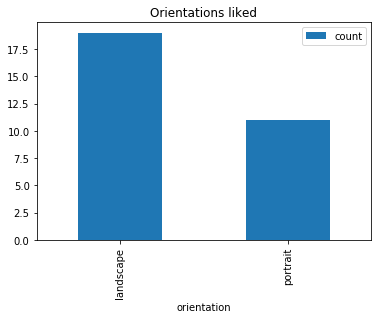

In [152]:
import os
import math 
import matplotlib.pyplot as plot
isLiked = resultframe["favorite"]=="Favorite"
dataframeLiked = dataframe.filter(items = resultframe[isLiked]["favorite"].index, axis = 0)
grouped = dataframeLiked.groupby(['orientation']).count()
dataframeLiked
grouped = grouped.rename(columns={'width':'count'})["count"].reset_index()
grouped.plot(x=0, kind='bar', title="Orientations liked")

In [153]:
#generating numerical labels
le1 = LabelEncoder()
dataframe['orientation'] = le1.fit_transform(dataframe['orientation'])

le2 = LabelEncoder()
resultframe['favorite'] = le2.fit_transform(resultframe['favorite'])

dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(dataframe, resultframe)

prediction = dtc.predict([
        [1,
         2,
         3,
         le1.transform(['landscape'])[0],
         12,
         23
        ]])
print(le2.inverse_transform(prediction))
print(dtc.feature_importances_)

['Favorite']
[0.27633234 0.3643386  0.15966067 0.         0.03157252 0.16809587]
